In [18]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

In [19]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_smo_canceled", "entropy", "w_kmeans",10, 30, 0.01, "Adam"])
print(len(runs_bp_smo))
run_ids_smo = get_run_ids(runs_bp_smo)
max(runs_bp_smo['metrics.acc'])

10


0.6242

In [20]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate"],[True, True, True, True, True],["bp_lmo_canceled", "entropy", "w_kmeans", 30, 0.01])
print(len(runs_bp_lmo))
run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
max(runs_bp_lmo['metrics.acc'])

10


0.5885

In [21]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "entropy", "w_kmeans",1000, 30, 0.01, "Adam"])
print(len(runs_centroids))
run_ids_centroids = get_run_ids(runs_centroids)
max(runs_centroids['metrics.acc'])

10


0.5866

In [26]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True, True],["bp_prop_clustersize", "entropy", "w_kmeans",1000, 30, 0.01, 10])
print(len(runs_bp_clusterwise))
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
max(runs_bp_clusterwise['metrics.acc'])

10


0.5724

In [23]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters"],[True, True, True, True, True, True, True],["boundary_points", "entropy", "w_kmeans",1000, 0.01, 30, 10])
print(len(runs_boundary))
run_ids_boundary = get_run_ids(runs_boundary)
max(runs_boundary['metrics.acc'])

10


0.598

In [24]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
run_ids_random = get_run_ids(runs_random)

10


In [8]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)

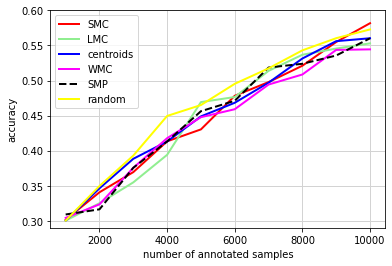

In [9]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

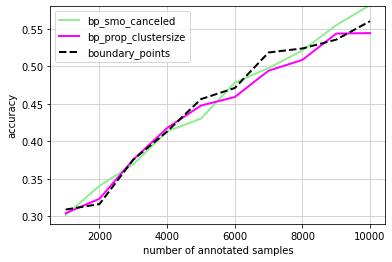

In [10]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [11]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.30158 0.34066 0.36939 0.41327 0.4303  0.47822 0.49776 0.52108 0.5549
 0.58168]
bp_lmo: [0.30025 0.32508 0.35478 0.39404 0.46922 0.47644 0.51374 0.53672 0.54554
 0.55297]


In [12]:
avg_accs_centroids

array([0.30021, 0.34633, 0.38839, 0.41301, 0.44882, 0.46826, 0.4969 ,
       0.53138, 0.55609, 0.56024])

In [13]:
avg_accs_clusterwise

array([0.30414, 0.32345, 0.37554, 0.41776, 0.4477 , 0.45906, 0.49423,
       0.50857, 0.54363, 0.54439])

In [14]:
avg_accs_bp_lmo

array([0.30025, 0.32508, 0.35478, 0.39404, 0.46922, 0.47644, 0.51374,
       0.53672, 0.54554, 0.55297])

In [15]:
avg_accs_bp_smo

array([0.30158, 0.34066, 0.36939, 0.41327, 0.4303 , 0.47822, 0.49776,
       0.52108, 0.5549 , 0.58168])

In [16]:
avg_accs_boundary

array([0.30899, 0.31634, 0.37561, 0.41306, 0.45625, 0.47107, 0.51849,
       0.52383, 0.53564, 0.56021])

In [17]:
avg_accs_random

array([0.30021, 0.34958, 0.39294, 0.44946, 0.46501, 0.49528, 0.51731,
       0.543  , 0.56033, 0.57283])